In [45]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
path = '/content/drive/MyDrive/Data_Mining_ Individual_Project/Kickstarter.xlsx'

In [131]:
kickstarter_df = pd.read_excel(path)

In [132]:
kickstarter_df = kickstarter_df.dropna()

In [133]:
#Dropping all  the observations other than success failed in project state 
kickstarter_df.drop(kickstarter_df[kickstarter_df['state']== 'canceled'].index, inplace = True)
kickstarter_df.drop(kickstarter_df[kickstarter_df['state']== 'live'].index, inplace = True)
kickstarter_df.drop(kickstarter_df[kickstarter_df['state']== 'suspended'].index, inplace = True)

In [134]:
kickstarter_df.describe()

,id,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
count,1.218000e+04,1.218000e+04,1.218000e+04,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.00000,...,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000
mean,1.071891e+09,8.603908e+04,1.979241e+04,174.851314,1.053905,1.992283e+04,5.764532,5.108949,19.065681,13.05468,...,15.514943,2014.170608,12.863218,6.609606,15.276190,2014.293678,12.606650,46.659770,34.539737,34.539819
std,6.164878e+08,1.231970e+06,1.163729e+05,1300.274077,0.233425,1.166781e+05,2.839881,2.411934,4.543840,3.17215,...,8.753535,1.121324,5.901121,3.351909,8.772746,1.105061,5.598673,101.946602,12.022155,12.022120
min,1.645550e+05,1.000000e+00,0.000000e+00,0.000000,0.112727,0.000000e+00,1.000000,1.000000,1.000000,1.00000,...,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,1.000000,1.000000
25%,5.469277e+08,3.500000e+03,2.522500e+01,2.000000,1.000000,2.600000e+01,3.000000,3.000000,17.000000,11.00000,...,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,3.000000,30.000000,30.000000
50%,1.073214e+09,1.050000e+04,7.010000e+02,13.000000,1.000000,7.357996e+02,6.000000,5.000000,20.000000,13.00000,...,15.000000,2014.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,13.000000,30.000000,30.000000
75%,1.606805e+09,4.000000e+04,5.847000e+03,64.000000,1.000000,6.065358e+03,8.000000,7.000000,22.000000,15.00000,...,23.000000,2015.000000,17.000000,9.000000,23.000000,2015.000000,17.000000,43.000000,39.000000,39.000000
max,2.147017e+09,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,30.00000,...,31.000000,2016.000000,23.000000,12.000000,31.000000,2016.000000,23.000000,1528.000000,91.000000,91.000000


In [135]:
kickstarter_df['create_to_deadline'] = kickstarter_df['create_to_launch_days']+ kickstarter_df['launch_to_deadline_days']

In [136]:
kickstarter_df['goal_usd'] = round(kickstarter_df['goal']*kickstarter_df['static_usd_rate'],3)

In [137]:
X = kickstarter_df[['goal','disable_communication', 'static_usd_rate', 'category','name_len', 'name_len_clean','blurb_len', 'blurb_len_clean', 
          'goal_usd','create_to_launch_days','launch_to_deadline_days','create_to_deadline','state'
        ]]
X = pd.get_dummies(X, columns = ['disable_communication','category','state'],drop_first = True)

<h3>  Data Visualization</h3>

In [56]:
kickstarter_df.goal.quantile([0.05,0.10,0.15,0.25,0.5,0.75,0.90, 0.99, 0.99])

0.05       500.00
0.10      1000.00
0.15      1978.45
0.25      3500.00
0.50     10500.00
0.75     40000.00
0.90    100000.00
0.99    810500.00
0.99    810500.00
Name: goal, dtype: float64

In [9]:
df =kickstarter_df[ kickstarter_df['goal']<70000]
df= df[df['goal']>500]

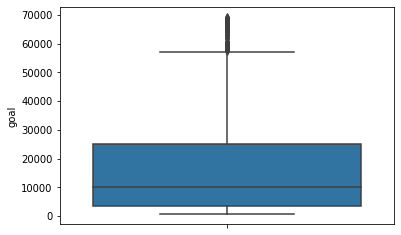

In [ ]:
sns.boxplot( y=df["goal"] );

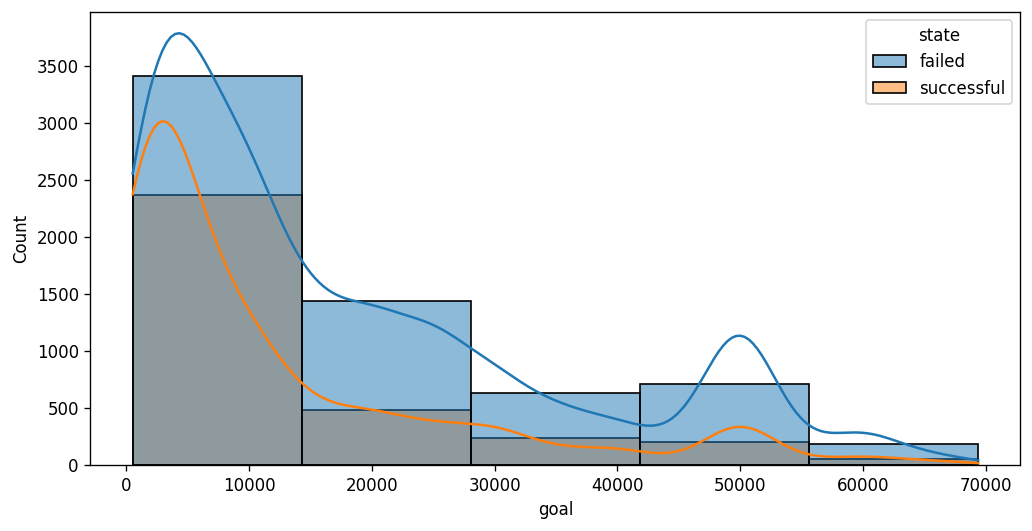

In [ ]:
plt.figure(figsize=(10,5),dpi=120)
sns.histplot(data=df,x='goal',bins=5,kde=True,hue ='state')

In [ ]:
kickstarter_df.create_to_launch_days.quantile([0.05,0.10,0.15,0.25,0.5,0.75,0.90, 0.95, 0.99])

0.05      0.00
0.10      1.00
0.15      1.00
0.25      3.00
0.50     13.00
0.75     43.00
0.90    112.00
0.95    207.00
0.99    529.26
Name: create_to_launch_days, dtype: float64

In [ ]:
df =kickstarter_df[ kickstarter_df['create_to_launch_days']<250]

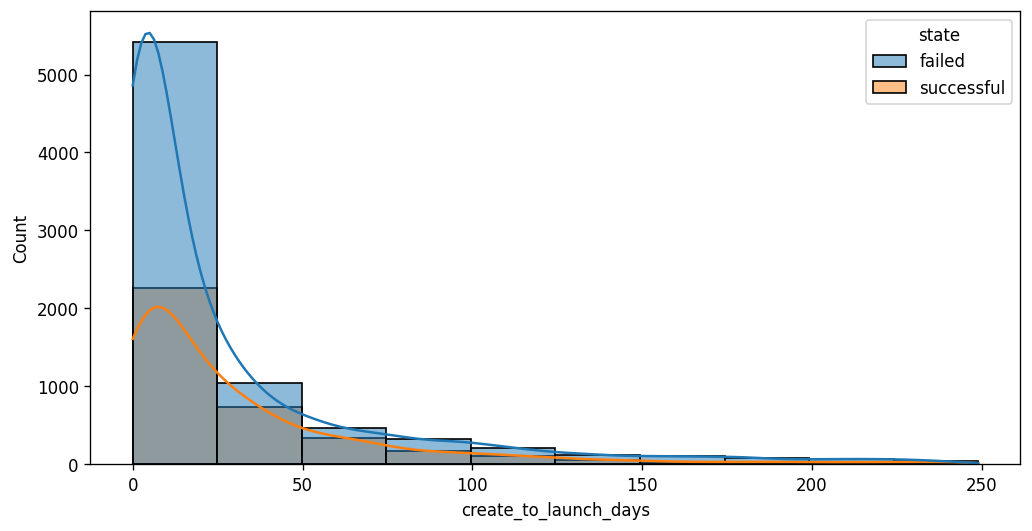

In [ ]:
plt.figure(figsize=(10,5),dpi=120)
sns.histplot(data=df,x='create_to_launch_days',bins=10,kde=True,hue ='state')

In [ ]:
kickstarter_df.create_to_deadline.quantile([0.05,0.10,0.15,0.25,0.5,0.75,0.90, 0.95, 0.99])

In [ ]:
df =kickstarter_df[ kickstarter_df['create_to_deadline']<250]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

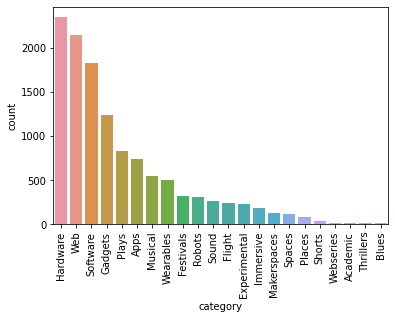

In [ ]:
sns.countplot(data=kickstarter_df,order = kickstarter_df['category'].value_counts().index, x ='category')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

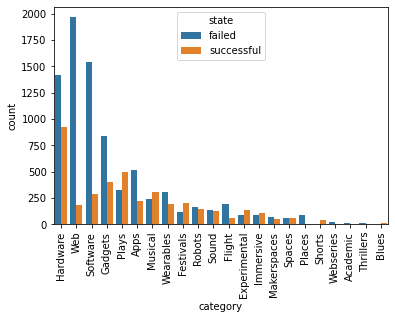

In [ ]:
sns.countplot(data=kickstarter_df,order = kickstarter_df['category'].value_counts().index, x ='category', hue = 'state')
plt.xticks(rotation = 90)

<h1> Implementation of K-Means Clustering</h1>

How correlated each of the features are with each cluster?

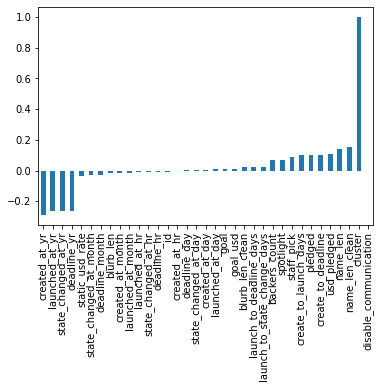

  Methodology for choosing the optimal  K-value

In [87]:
ssd = []
for k in range(2,60):
  model = KMeans(n_clusters = k)
  model.fit(X_std)
  ssd.append(model.inertia_)

Text(0.5, 1.0, 'Variation of the model inertia with k')

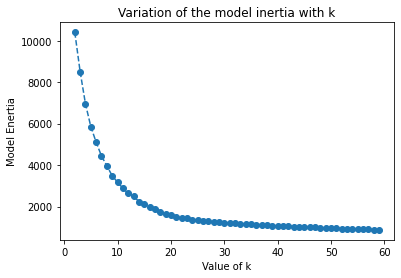

In [88]:
plt.plot(range(2,60),ssd,'o--')
plt.xlabel("Value of k")
plt.ylabel("Model Enertia")
plt.title("Variation of the model inertia with k")

Visualising the correlation between the variables and clustera

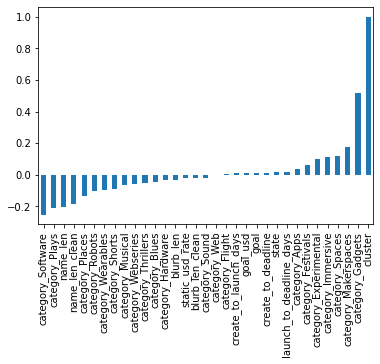

In [156]:
X_std.corr()['cluster'].sort_values().plot(kind='bar')

In [89]:
 pd.Series(ssd).diff()

0             NaN
1    -1900.933299
2    -1557.184531
3    -1091.180532
4     -755.899064
5     -662.722574
6     -472.361294
7     -480.387990
8     -309.997166
9     -290.902059
10    -249.746629
11    -136.520655
12    -258.034043
13    -141.942139
14    -103.656569
15    -130.284048
16    -136.875459
17     -87.843483
18     -51.715638
19     -88.860686
20     -64.185883
21      -8.972633
22     -52.421453
23     -44.296336
24      -9.032926
25     -34.548791
26     -26.762831
27     -16.194839
28     -26.602387
29       4.412566
30     -34.012370
31     -20.347617
32      -9.789726
33     -21.394235
34      -7.573221
35       0.031537
36     -37.310485
37      -6.172360
38     -32.813075
39      14.894195
40     -22.687935
41      -9.925948
42     -12.579360
43     -13.854748
44      -5.665533
45     -12.061594
46     -11.709978
47      -7.590328
48     -11.046957
49     -17.839566
50      -2.541564
51      -9.487323
52      -4.767260
53      -3.256009
54     -23.648650
55      -1

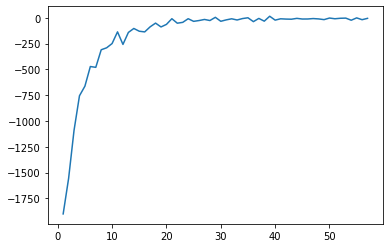

In [90]:
s = pd.Series(ssd).diff()   #Calculate the difference between the two rows
plt.plot(s.index, s.values)
cluster_labels = model.fit_predict(X_std)

In [140]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=21)
cluster_labels = model.fit_predict(X_std)
X_std['cluster'] = cluster_labels

In [141]:
X_std['cluster'] = cluster_labels

In [142]:
X_std['state'] = X['state_successful']

In [143]:
#for (k = 14)
fail_list = []
success_list=[]
print("Cluster_label",'\t\t\t',"Failure %",'\t\t\t',"Success %")
for i in range (max(cluster_labels)):
  df = X_std[X_std['cluster']==i]
  df_0 = df[df['state']==0.0]
  fail = len(df_0)
  fail_list.append(fail)
  df_1 = df[df['state']==1.0]
  success = len(df_1)
  success_list.append(success)
  df_1 = len(df_1)
  fail_percent = fail*100/(fail+success)
  success_percent = success*100/(fail+success)
  print(i,'\t\t\t\t',round(fail_percent,2),'\t\t\t\t',round(success_percent,3))

Cluster_label 			 Failure % 			 Success %
0 				 71.22 				 28.777
1 				 71.74 				 28.261
2 				 71.12 				 28.877
3 				 67.57 				 32.432
4 				 72.42 				 27.582
5 				 73.19 				 26.807
6 				 66.67 				 33.333
7 				 71.91 				 28.093
8 				 69.16 				 30.841
9 				 68.45 				 31.553
10 				 77.6 				 22.396
11 				 70.35 				 29.65
12 				 69.32 				 30.682
13 				 69.61 				 30.395
14 				 67.84 				 32.164
15 				 71.03 				 28.966
16 				 71.73 				 28.266
17 				 70.21 				 29.787
18 				 70.57 				 29.433
19 				 68.25 				 31.753


There are certian clusters in which the success percent is less than other clusters such as cluster 5,10 There are certain clusters such as cluster 6, cluster 3 which have comparitively larger success percentage. Since only the variables that are available at the time of project creation are used in clustering, this method can be effective in the prediction of the success or failure of the project based on the cluster it is assigned.

For example, if we get the intital variables before the project start and the cluster assigned to the project is cluster 10, we can infere that the project is less likely to succeed.

In [151]:
X_std1 = X_std1.drop(['cluster','state_successful'],axis=1)

In [153]:
pd.set_option('display.max_columns', 500)
cluster_centers = pd.DataFrame(model.cluster_centers_, columns=X_std1.columns)
cluster_centers

,goal,static_usd_rate,name_len,name_len_clean,blurb_len,blurb_len_clean,goal_usd,create_to_launch_days,launch_to_deadline_days,create_to_deadline,category_Apps,category_Blues,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries
0,0.000106,0.595355,0.273783,0.262748,0.538830,0.391709,0.000110,0.019689,0.366479,0.040506,4.163336e-17,5.617978e-02,-3.469447e-18,6.245005e-17,2.775558e-17,0.000000e+00,2.220446e-16,-1.908196e-17,6.938894e-18,-1.387779e-17,4.719101e-01,1.387779e-16,3.816392e-17,2.134831e-01,-1.942890e-16,2.081668e-17,1.040834e-17,7.303371e-02,2.081668e-17,1.387779e-16,1.011236e-01
1,0.000719,0.580679,0.451752,0.439769,0.552013,0.430610,0.000662,0.031438,0.388541,0.053311,-4.024558e-16,8.673617e-19,2.185752e-16,-1.942890e-16,3.816392e-17,-7.216450e-16,-8.326673e-16,1.908196e-17,-1.214306e-17,-1.457168e-16,6.505213e-17,-6.383782e-16,4.857226e-17,-2.038300e-17,1.000000e+00,-9.020562e-17,2.949030e-17,-4.336809e-18,3.261280e-16,4.163336e-16,1.040834e-17
2,0.000798,0.577381,0.431405,0.418150,0.545120,0.423589,0.000657,0.027797,0.373588,0.048874,-3.608225e-16,8.673617e-19,2.359224e-16,-2.046974e-16,3.816392e-17,-7.632783e-16,-9.159340e-16,3.469447e-17,-1.734723e-17,-2.081668e-16,7.546047e-17,-7.216450e-16,8.326673e-17,-2.602085e-17,5.551115e-16,-1.006140e-16,2.949030e-17,-5.421011e-18,3.330669e-16,1.000000e+00,1.040834e-17
3,0.000308,0.573389,0.495212,0.470502,0.563128,0.427904,0.000280,0.027677,0.370973,0.048605,1.000000e+00,8.673617e-19,-1.040834e-17,3.469447e-18,3.469447e-17,-2.775558e-17,5.551115e-16,-2.602085e-17,1.734723e-17,1.526557e-16,-1.127570e-17,1.665335e-16,-1.387779e-17,6.071532e-18,-4.718448e-16,9.367507e-17,2.255141e-17,3.469447e-18,1.942890e-16,3.053113e-16,6.722053e-18
4,0.001392,0.569519,0.198754,0.204968,0.498351,0.389766,0.001491,0.037544,0.382970,0.058981,6.245005e-17,-4.336809e-18,2.359224e-16,-2.012279e-16,4.163336e-17,-2.220446e-16,1.000000e+00,1.405126e-16,3.816392e-17,-3.677614e-16,8.239937e-17,-7.077672e-16,-1.040834e-17,-3.209238e-17,1.443290e-15,-1.006140e-16,2.949030e-17,-5.421011e-18,3.330669e-16,4.163336e-16,1.040834e-17
5,0.000072,0.648436,0.309230,0.300437,0.551888,0.434600,0.000074,0.020056,0.334086,0.038994,-5.412337e-16,9.757820e-19,2.046974e-16,-1.804112e-16,4.163336e-17,-6.661338e-16,-7.494005e-16,-3.295975e-17,-4.683753e-17,6.938894e-18,5.377643e-17,1.000000e+00,1.387779e-17,-1.387779e-17,-1.665335e-16,-7.632783e-17,2.949030e-17,-3.469447e-18,3.191891e-16,4.163336e-16,1.019150e-17
6,0.001704,0.566164,0.347863,0.351578,0.519985,0.405836,0.001711,0.032519,0.382692,0.054034,-8.326673e-17,8.673617e-19,-6.938894e-18,6.591949e-17,3.469447e-17,1.526557e-16,7.771561e-16,-2.428613e-17,1.734723e-17,1.179612e-16,-1.040834e-17,1.665335e-16,1.000000e+00,4.336809e-18,-4.163336e-16,8.673617e-17,2.081668e-17,2.168404e-18,1.526557e-16,3.053113e-16,5.637851e-18
7,0.000591,0.566328,0.360504,0.363817,0.527131,0.414204,0.000572,0.040459,0.375326,0.061400,-3.608225e-16,9.757820e-19,8.673617e-17,-8.326673e-17,3.816392e-17,-3.330669e-16,-5.551115e-17,-2.775558e-17,-3.469447e-17,2.012279e-16,2.602085e-18,-1.110223e-16,-8.673617e-17,8.239937e-18,-5.273559e-16,1.734723e-17,2.602085e-17,1.301043e-18,1.000000e+00,3.885781e-16,8.456777e-18
8,0.000321,0.613237,0.331265,0.333099,0.550612,0.440410,0.000345,0.023754,0.346634,0.043348,-3.955170e-16,7.589415e-19,8.673617e-17,-1.040834e-16,3.469447e-17,-4.024558e-16,-2.220446e-16,-2.949030e-17,-4.510281e-17,1.000000e+00,-2.602085e-18,-6.938894e-17,-1.214306e-16,8.673617e-18,-5.273559e-16,-3.469447e-18,2.775558e-17,2.385245e-18,2.706169e-16,3.885781e-16,8.890458e-18
9,0.000493,0.589449,0.352632,0.361481,0.523552,0.421182,0.000493,0.040327,0.365497,0.060703,-2.081668e-17,7.589415e-19,-6.938894e-18,6.

Looking at cluster 6 we can see that projects with higher goal ,goal_usd(goal in USD) are more likely to succeed since the specific feature of this cluster is higher  value for goal. The success rate of this cluster is compared to other clusters is  the highest
<br>

We can see that the  cluster 10 which has  a high percent of failure has  higher value for category_flight. Hence this feature could be a red alert for the project to fail and the project should be scrutinised before launching